In [ ]:
! pip install mediapipe

In [54]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# initialize Pose estimator
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [4]:
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

In [5]:
def stream_pose(model, video_path):
    cap = cv2.VideoCapture(video_path)
    while cap.isOpened():
        # read frame from capture object
        _, frame = cap.read()

        try:
            # convert the frame to RGB format
            RGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # process the RGB frame to get the result
            results = model.process(RGB)

            print(results.pose_landmarks)
            # draw detected skeleton on the frame
            mp_drawing.draw_landmarks(
                frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            # show the final output
            cv2.imshow('Output', frame)
        except:
            break
        if cv2.waitKey(1) == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


In [67]:
# create capture object
cap = cv2.VideoCapture('../data/video/a109-1310C.mp4')
if (cap.isOpened() == False): 
    print("Error reading video file")
  
# We need to set resolutions.
# so, convert them from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
size = (frame_width, frame_height)

result = cv2.VideoWriter('../data/pose_data/sample_pose.mp4', 
                         cv2.VideoWriter_fourcc(*'MJPG'),
                         10, size)
result_list = []
while cap.isOpened():
    # read frame from capture object
    _, frame = cap.read()

    try:
        # convert the frame to RGB format
        RGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # process the RGB frame to get the result
        results = pose.process(RGB)
        result_list.append(results)
        # print(results.pose_landmarks)
        # # draw detected skeleton on the frame
        mp_drawing.draw_landmarks(
            frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # # show the final output
        result.write(frame)
        cv2.imshow('Output', frame)
        
    except:
        break
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
result.release()
cv2.destroyAllWindows()

In [73]:
frame_10 = result_list[-1]
ldm = frame_10.pose_landmarks

In [82]:
skeleton_video = []

for frame in result_list[1:]:
    point_list = []
    for idx, landmark in enumerate(frame.pose_landmarks.landmark):
        # print(idx, landmark.x)
        # print(type(landmark))
        coord = [landmark.x, landmark.y, landmark.z]
        point_list.append(coord)
    skeleton_video.append(point_list)

skeleton_video = np.array(skeleton_video)


In [83]:
skeleton_video.shape

(149, 33, 3)

In [89]:
height, width = 512, 512
img_3 = np.zeros([height, width,3],dtype=np.uint8)
img_3.fill(255)

In [90]:
# add frame 10 points to the image 
frame_10 = skeleton_video[100, ...]
# add circles 
for coord in frame_10:
    x, y = int(width*coord[0]), int(height*coord[1])
    img_3 = cv2.circle(img_3, center=(x,y), radius=1, color=(255, 0, 0), thickness=6)


In [91]:
mapping_list = [(11, 12), (11, 13), (13, 15), (12, 14), (14, 16), (12, 24), (11, 23), (23, 24), (24, 26), (26, 28), (23, 25), (25, 27)]

In [92]:
# add lines 
for line in mapping_list:
    i, j = line
    st = frame_10[i, :]
    start_point = (int(width*st[0]), int(height*st[1]))

    en = frame_10[j, :]
    end_point = (int(width*en[0]), int(height*en[1]))

    img3_ = cv2.line(img_3, start_point, end_point, color=(0, 0, 0), thickness=3)

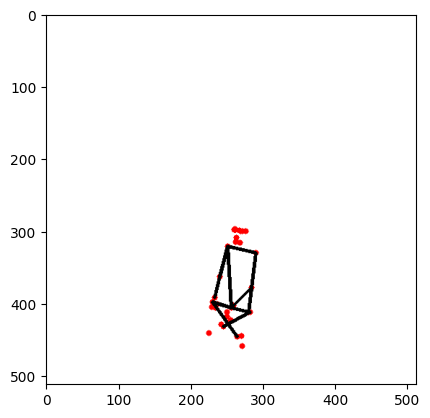

In [93]:
plt.imshow(img_3)

In [94]:
def gen_skeleton(frame, connections, height, width):
    img_3 = np.zeros([height, width,3],dtype=np.uint8)
    img_3.fill(255)

    # add circles 
    for coord in frame:
        x, y = int(width*coord[0]), int(height*coord[1])
        img_3 = cv2.circle(img_3, center=(x,y), radius=1, color=(255, 0, 0), thickness=6)

    # add lines 
    for line in mapping_list:
        i, j = line
        st = frame[i, :]
        start_point = (int(width*st[0]), int(height*st[1]))

        en = frame[j, :]
        end_point = (int(width*en[0]), int(height*en[1]))

        img3_ = cv2.line(img_3, start_point, end_point, color=(0, 0, 0), thickness=3)

    return img_3

In [123]:
# create capture object
cap = cv2.VideoCapture('../data/video/prelinger_they_grow_up_so_fast_1_run_f_nm_np1_ba_med_6.avi')
if (cap.isOpened() == False): 
    print("Error reading video file")
  
# We need to set resolutions.
# so, convert them from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
size = (frame_width, frame_height)

result = cv2.VideoWriter('../data/pose_data/pose-prelinger_they_grow_up.mp4', 
                         cv2.VideoWriter_fourcc(*'MJPG'),
                         10, size)
skeleton_video = []
while cap.isOpened():
    # read frame from capture object
    _, frame = cap.read()

    try:
        # convert the frame to RGB format
        RGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # process the RGB frame to get the result
        results = pose.process(RGB)
        try:
            frame_result = results.pose_landmarks.landmark
            point_list = []
            for idx, landmark in enumerate(frame_result):
                # print(idx, landmark.x)
                # print(type(landmark))
                coord = [landmark.x, landmark.y, landmark.z]
                point_list.append(coord)
            skeleton_video.append(point_list)

            res_frame = gen_skeleton(np.array(point_list), mapping_list, frame_height, frame_width)
            result.write(res_frame)
        except Exception as inst:
            print(inst)
            pass

        # print(results.pose_landmarks)
        # # draw detected skeleton on the frame
        mp_drawing.draw_landmarks(
            frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # # show the final output'
        # print(frame.shape, res_frame.shape)
        
        cv2.imshow('Output', frame)
        
    except Exception as inst:
        print(inst)
        break
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
result.release()
cv2.destroyAllWindows()

'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
'NoneType' object has no attribute 'landmark'
OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



In [113]:
def pose_estimator(model, path):
    # create capture object
    cap = cv2.VideoCapture(path)
    if (cap.isOpened() == False): 
        print("Error reading video file")
    
    # We need to set resolutions.
    # so, convert them from float to integer.
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    size = (frame_width, frame_height)

    skeleton_video = []
    while cap.isOpened():
        # read frame from capture object
        _, frame = cap.read()

        try:
            # convert the frame to RGB format
            RGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # process the RGB frame to get the result
            results = pose.process(RGB)
            try:
                frame_result = results.pose_landmarks.landmark
                point_list = []
                for idx, landmark in enumerate(frame_result):
                    # print(idx, landmark.x)
                    # print(type(landmark))
                    coord = [landmark.x, landmark.y, landmark.z]
                    point_list.append(coord)
                skeleton_video.append(point_list)
            except Exception as inst:
                print(inst)
                pass
            
        except Exception as inst:
            print(inst)
            break
        if cv2.waitKey(1) == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

    return np.array(skeleton_video), frame_height, frame_width

In [114]:
skel_res, fh, fw = pose_estimator(pose, '../data/video/a109-1310C.mp4')

'NoneType' object has no attribute 'landmark'
OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



In [115]:
def gen_video(points, save_file, frame_h, frame_w):
    size = (frame_w, frame_h)
    result = cv2.VideoWriter(save_file, 
                         cv2.VideoWriter_fourcc(*'MJPG'),
                         10, size)

    for frame in points:
        skel_image = gen_skeleton(frame, mapping_list, frame_h, frame_w)
        result.write(skel_image)

    result.release()

In [116]:
gen_video(skel_res, '../data/pose_data/sample_poes_gen.mp4', fh, fw)

In [112]:
skel_res.shape

(149, 33, 3)